## opg 1 b

In [273]:
from astropy import constants as const
import numpy as np

In [274]:
const.c.value

299792458.0

In [275]:
def group_delay(n: float, y: float, dn_dy: float, z: float) -> float:
    c = const.c.value * 1e9
    output = z /c  * (n - y * dn_dy)
    return output
    

n(800 nm) = 1.45332 dn/d(800 nm) = -0.0173 (m)-1
n(670 nm) = 1.45601 dn/d(670 nm) = -0.0252 (microm)-1
n(400 nm) = 1.47012 dn/d(400 nm) = -0.1091 (m)-1

In [276]:

ys = np.array([800, 670, 400])
ns = np.array([1.45332, 1.45601, 1.47012]) 
dn_dys = np.array([-0.0173, -0.0252, -0.1091]) * 1e3 # to get all in nanometers


In [277]:
for y, n, dn_dy in zip(ys, ns, dn_dys):
    print("delay", y, "nm", group_delay(n, y, dn_dy, 0.01 * 1e9))

delay 800 nm 4.6170118529132573e-07
delay 670 nm 5.632381855983848e-07
delay 400 nm 1.4557227493694986e-06


## opg 2

a) Plot n() for fused silica glass in the range 0.2 m <  < 1.5 m, e.g. based on
Table 23 from the attached note. (You may want to use MatLab – see below).

In [278]:
import matplotlib.pyplot as plt

In [279]:
def fused_sili(x: float) -> float:
    n=(1+0.6961663/(1-(0.0684043/x)**2)+0.4079426/(1-(0.1162414/x)**2)+0.8974794/(1-(9.896161/x)**2))**0.5
    return n

In [280]:
fused_sili(0.4)

1.4701161185594052

In [281]:
xs = np.linspace(0.2, 1.5, 100)
ys = [fused_sili(i) for i in xs]

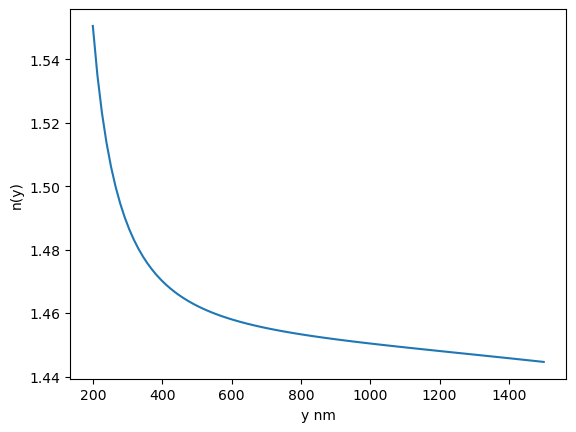

In [282]:
plt.plot(xs*1e3, ys)
plt.ylabel("n(y)")
plt.xlabel("y nm")
plt.show()

b) Calculate dn/d at 400 nm, 670 nm and at 800 nm. Use one of the following three
approaches: (i) Analytically differentiate the Sellmeier equation or (ii) find the
values graphically from the graph from (a) or (iii) use a numerical derivative in e.g.
MatLab. Compare to the values that were given in Opgave 1

In [283]:
from scipy.misc import derivative

In [284]:
xs = np.array([800, 670, 400]) * 1e-3

In [285]:
for x in xs:
    print(round(x*1e3,0), "nm :", derivative(fused_sili, x, dx=1e-6, n=1), "10^6")

800.0 nm : -0.017284375708470634 10^6
670.0 nm : -0.025232694822463486 10^6
400.0 nm : -0.10913237846743584 10^6


korrekte værdier

n(800 nm) = 1.45332 dn/d(800 nm) = -0.0173 (m)-1
n(670 nm) = 1.45601 dn/d(670 nm) = -0.0252 (microm)-1
n(400 nm) = 1.47012 dn/d(400 nm) = -0.1091 (m)-1

## opg 3 b

b) Calculate the GDD for 1 cm of BK7 glass at 800 nm, at 600 nm and at 400 nm.
Give the answers in units of fs2
and compare with the values from the CVI graph.
11 2
2
2
(800 ) 0.49 10 
nm   m
d
d n

11 2
2
2
(600 ) 1.79 10 
nm   m
d
d n

12 2
2
2
(400 ) 1.08 10 
nm   m
d
d n

c

In [286]:
def GDD(y, dn_dy2, z):
    c = const.c.value
    output = y**3 * z * dn_dy2 / (2 * np.pi * c **2)
    return output

In [287]:
ys = np.array([800, 600, 400])
dn_dy2s = np.array([0.49, 1.79, 10.8]) * 1e11

In [288]:
GDD_vals

{800: 0.4442677279369207, 600: 0.6846766355609496, 400: 1.224002923907843}

In [289]:
GDD_vals = {}
for y, dn_dy2 in zip(ys, dn_dy2s):
    GDD_vals[y] = GDD(y, dn_dy2, 0.01)
    print(y, "nm GDD -> ", GDD(y*1e-9, dn_dy2, 0.01) * 1e30, "(fs)^2")

800 nm GDD ->  444.26772793692083 (fs)^2
600 nm GDD ->  684.6766355609499 (fs)^2
400 nm GDD ->  1224.0029239078433 (fs)^2


c) Use one of the procedures outlined in Opgave 2 to verify the values given above.

In [290]:
def BK7(x: float) -> float:
    n=(1+1.03961212/(1-0.00600069867/x**2)+0.231792344/(1-0.0200179144/x**2)+1.01046945/(1-103.560653/x**2))**.5
    return n

In [291]:
xs = np.array([800, 600, 400]) * 1e-3
for x in xs:
    print(round(x*1e3,0), "nm :", derivative(BK7, x, dx=1e-6, n=2) ,"in pr micro meter squared so 10^12")

800.0 nm : 0.04929390229335695 in pr micro meter squared so 10^12
600.0 nm : 0.1787459069646502 in pr micro meter squared so 10^12
400.0 nm : 1.0769163338864018 in pr micro meter squared so 10^12


## opg 4

Calculate the pulse duration of an initially transform-limited, Gaussian shaped pulse
after it has passed through 1 cm of BK7 glass:
a) For  = 800 nm and start = 10 fs, 20 fs, 100 fs, 1 ps
b) For  = 600 nm and start = 10 fs, 20 fs, 100 fs, 1 ps

In [292]:
def CVI(t_0, GDD):
    t = t_0 * np.sqrt(1 + (4 * np.log(2) * GDD / t_0**2)**2)
    return t

In [293]:
times = np.array([10, 20, 100, 1000]) * 1e-15

In [304]:
for i in times:
    for y in [800, 600]:
        print(GDD_vals[y])
        print("time:", round(i*1e15,0), "fs y:", y, "nm: CVI", round(CVI(i, GDD_vals[y])*1e-15, 3), "fs")
        

0.4442677279369207
time: 10.0 fs y: 800 nm: CVI 0.123 fs
0.6846766355609496
time: 10.0 fs y: 600 nm: CVI 0.19 fs
0.4442677279369207
time: 20.0 fs y: 800 nm: CVI 0.062 fs
0.6846766355609496
time: 20.0 fs y: 600 nm: CVI 0.095 fs
0.4442677279369207
time: 100.0 fs y: 800 nm: CVI 0.012 fs
0.6846766355609496
time: 100.0 fs y: 600 nm: CVI 0.019 fs
0.4442677279369207
time: 1000.0 fs y: 800 nm: CVI 0.001 fs
0.6846766355609496
time: 1000.0 fs y: 600 nm: CVI 0.002 fs


## opg 10

This is an exercise about mode locking. As an example we will look at the CO2 laser.
This laser emits at a central wavelength of 10.6 m.
a) Use a computer to plot E(t) inside the laser if the laser operates in a single
longitudinal mode with a wavelength of 10.6 m. Restrict the plot to a time
interval from -200 fs to 200 fs. (Do not worry about the units for the E-field)

In [245]:
def E(t, w):
    output = np.cos(w*t)
    return output

In [248]:
times = np.linspace(-200, 200, 10000) * 1e-15
ys = [E(i, 2*np.pi*const.c.value/(10.6*1e-6)) for i in times]

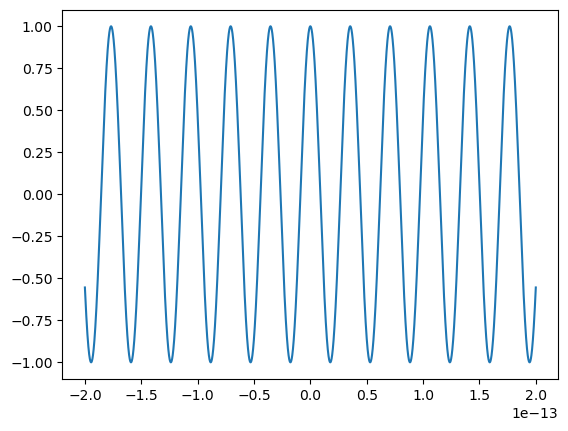

In [249]:
plt.plot(times, ys)
plt.show()

For simplicity, but rather hypothetically, we assume that the length of the laser
oscillator is 150 m.
b) Calculate the frequency spacing, , between the longitudinal modes.

In [161]:
L = 150 * 1e-6
delta_v = const.c.value/(2*L)

In [164]:
1/delta_v

1.0006922855944561e-12

c) Write an expression for the resulting E-field, Etotal(t), made up of the three modes
with frequencies central, central + , central - , where central = c/(10.6 m).
Assume that the gain is the same for all three modes

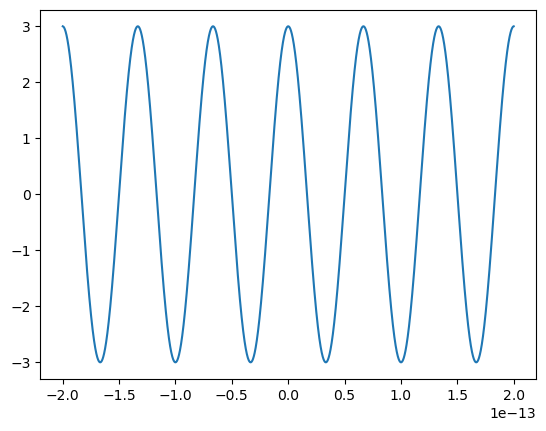

In [165]:
ys = [E(i, 2*np.pi*const.c.value/(10.6*1e-6) - 1/del) for i in times]
plt.plot(times, ys)
plt.show()

d) Assume that the three modes have the same phase at t=0. Plot Etotal(t), for t in the
range -2000 fs - +2000 fs.
Also, plot I(t) (again, do not care about the units - only the shape is interesting) for
the same time interval.

In [254]:
delta_v * 1e-12, 2*np.pi*const.c.value/(10.6*1e-6) * 1e-12

(0.9993081933333333, 177.70297804800504)

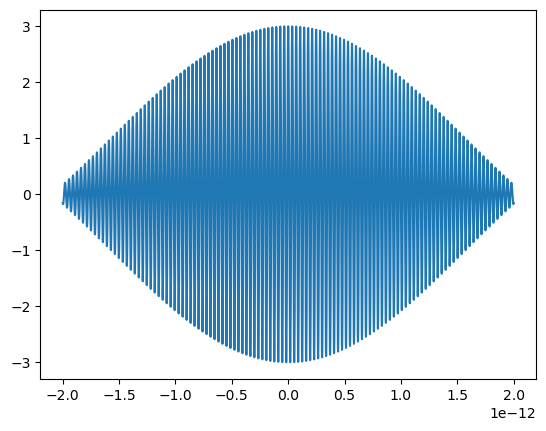

In [255]:
times = np.linspace(-2000, 2000, 100000) * 1e-15
ys = [E(i, 2*np.pi*const.c.value/(10.6*1e-6)) + 
      E(i, 2*np.pi*const.c.value/(10.6*1e-6) + delta_v) + 
        E(i, 2*np.pi*const.c.value/(10.6*1e-6) - delta_v) for i in times]
plt.plot(times, ys)
plt.show()

In [ ]:
# I want to plot I(t) and is this just not E^2 times some constant

In [315]:
def modes(v, l):
    return v*2*L/const.c.value


In [316]:
modes(1700 * 10**12, 1.5)

1701.1768855105752

In [319]:
modes(10*10**12, 1.5)

10.006922855944559

In [354]:
time_between = const.c.value/(2*1.5)
print("f_rep", round(time_between*1e-6, 2), "M Hz E_pulse", round(1/time_between*1e9, 2), 
      "nJ p_pulse", round(1/time_between/30e-15*1e-6, 2), "MW")



f_rep 99.93 M Hz E_pulse 10.01 nJ p_pulse 0.33 MW


In [330]:
time_between*1e-6

99.93081933333332

In [356]:
P = 1  # find this from the slide and wiki relations 

E = np.sqrt(2*P/(const.c.value*const.eps0.value*np.pi*10**2))



E

1.548657375052888